In [1]:
import pandas as pd
import numpy as np 

## Import Data and Preprocess

In [2]:
df = pd.read_csv("dataset_comb.csv")

In [3]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [4]:
df = df.drop(['id'],axis=1)
df['Class'] = [0 if x == 'jasmine' else 1 for x in df['Class']]

In [5]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

## Normalize data

In [6]:
for col in X.columns:
    if col!='Class':
        max_val = X[col].max()
        min_val = X[col].min()
        for val in X[col]:
            norm_val = (max_val - val)/(max_val - min_val)
            X[col] = X[col].replace(val, norm_val)

In [7]:
X = X.values
Y = Y.values

## Import Classifiers from Sklearn

In [8]:
from sklearn.model_selection import train_test_split,KFold 

In [9]:
cv = KFold(n_splits = 7,random_state = 3,shuffle = True)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Initializing Classifier Objects

In [18]:
fc = LinearDiscriminantAnalysis()
pc = Perceptron()
nb = GaussianNB()
lr = LogisticRegression()
ann = MLPClassifier()
svm = SVC()


fc_score_train = []
pc_score_train = []
nb_score_train = []
lr_score_train = []
ann_score_train = []
svm_score_train = []

fc_score_test = []
pc_score_test = []
nb_score_test = []
lr_score_test = []
ann_score_test = []
svm_score_test = []

## Train, Test and Calculate Accuracy

In [19]:
for train_index,test_index in cv.split(X):
   
    X_train,X_test = X[train_index], X[test_index]
    Y_train,Y_test = Y[train_index], Y[test_index]
    
    #train all the classifiers with train data
    fc.fit(X_train,Y_train)
    pc.fit(X_train,Y_train)
    nb.fit(X_train,Y_train)
    lr.fit(X_train,Y_train)
    ann.fit(X_train,Y_train)
    svm.fit(X_train,Y_train)
    
    #preditct train data 
    Y_pred_fc_train = fc.predict(X_train)
    Y_pred_pc_train = pc.predict(X_train)
    Y_pred_nb_train = nb.predict(X_train)
    Y_pred_lr_train = lr.predict(X_train)
    Y_pred_ann_train = ann.predict(X_train)
    Y_pred_svm_train = svm.predict(X_train)
    
    #calculate train accuraciies and appento train_accuracy
    fc_score_train.append(accuracy_score(Y_train,Y_pred_fc_train))
    pc_score_train.append(accuracy_score(Y_train,Y_pred_pc_train))
    nb_score_train.append(accuracy_score(Y_train,Y_pred_nb_train))
    lr_score_train.append(accuracy_score(Y_train,Y_pred_lr_train))
    ann_score_train.append(accuracy_score(Y_train,Y_pred_ann_train))
    svm_score_train.append(accuracy_score(Y_train,Y_pred_svm_train))
    
    #predict test data
    Y_pred_fc_test = fc.predict(X_test)
    Y_pred_pc_test = pc.predict(X_test)
    Y_pred_nb_test = nb.predict(X_test)
    Y_pred_lr_test = lr.predict(X_test)
    Y_pred_ann_test = ann.predict(X_test)
    Y_pred_svm_test = svm.predict(X_test)

    #calculate test accuraciies and appento test_accuracy
    fc_score_test.append(accuracy_score(Y_test,Y_pred_fc_test))
    pc_score_test.append(accuracy_score(Y_test,Y_pred_pc_test))
    nb_score_test.append(accuracy_score(Y_test,Y_pred_nb_test))
    lr_score_test.append(accuracy_score(Y_test,Y_pred_lr_test))
    ann_score_test.append(accuracy_score(Y_test,Y_pred_ann_test))
    svm_score_test.append(accuracy_score(Y_test,Y_pred_svm_test))

## Print Accuracies

In [20]:
names = ['Linear Discriminant']
test_dict = {'Linear Discriminant': fc_score_test , 'Perceptron' : pc_score_test, 'Naive-Bayes' : nb_score_test, 'Logistic Regression' : lr_score_test,'ANN' : ann_score_test,'SVM' : svm_score_test}
test_acc = pd.DataFrame(test_dict)
train_dict = {'Linear Discriminant': fc_score_train , 'Perceptron' : pc_score_train, 'Naive-Bayes' : nb_score_train, 'Logistic Regression' : lr_score_train,'ANN' : ann_score_train,'SVM' : svm_score_train}
train_acc = pd.DataFrame(train_dict)

In [21]:
train_acc

,Linear Discriminant,Perceptron,Naive-Bayes,Logistic Regression,ANN,SVM
0,0.984474,0.987682,0.985372,0.987425,0.989671,0.988773
1,0.983576,0.980753,0.983512,0.986335,0.988773,0.988259
2,0.983255,0.982165,0.983704,0.986784,0.989286,0.987939
3,0.984089,0.982165,0.984603,0.986976,0.989350,0.988452
4,0.984153,0.971386,0.985501,0.987618,0.989863,0.989029
5,0.985052,0.941682,0.985308,0.987746,0.990697,0.989286
6,0.984090,0.985373,0.984732,0.987426,0.989543,0.988966


In [22]:
test_acc

,Linear Discriminant,Perceptron,Naive-Bayes,Logistic Regression,ANN,SVM
0,0.980370,0.985373,0.980370,0.985758,0.988838,0.987683
1,0.988453,0.981524,0.988838,0.991532,0.991917,0.991147
2,0.988453,0.988838,0.987683,0.989222,0.993457,0.992302
3,0.984604,0.983449,0.986913,0.988068,0.991147,0.989607
4,0.983064,0.973056,0.984604,0.984604,0.988068,0.986143
5,0.978060,0.946112,0.980370,0.983834,0.986528,0.984604
6,0.984983,0.986523,0.984213,0.986138,0.988833,0.986908


## Box Plots


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

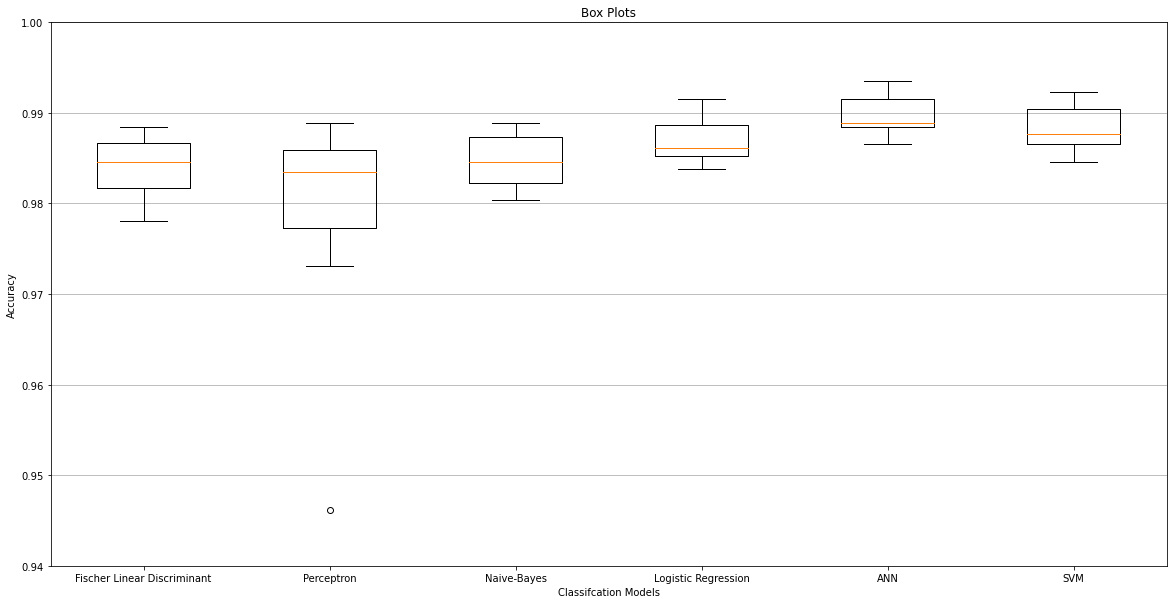

In [24]:
accuracy = list([fc_score_test,pc_score_test,nb_score_test,lr_score_test,ann_score_test,svm_score_test])
fig,ax = plt.subplots(figsize=(20,10))
ax.boxplot(accuracy)
ax.set_ylim([0.94,1.0])
ax.set_title('Box Plots')
ax.set_xlabel('Classifcation Models')
ax.set_ylabel('Accuracy')
xticklabels = ["Fischer Linear Discriminant","Perceptron","Naive-Bayes","Logistic Regression","ANN","SVM"]
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()